In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
train_path = r'C:\Users\siddh\Downloads\Maize-Diseases-Detection-master\Maize-Diseases-Detection-master\Traning\Dataset\train'
valid_path=r'C:\Users\siddh\Downloads\Maize-Diseases-Detection-master\Maize-Diseases-Detection-master\Traning\Dataset\testt'

In [5]:
os.listdir(train_path)

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight']

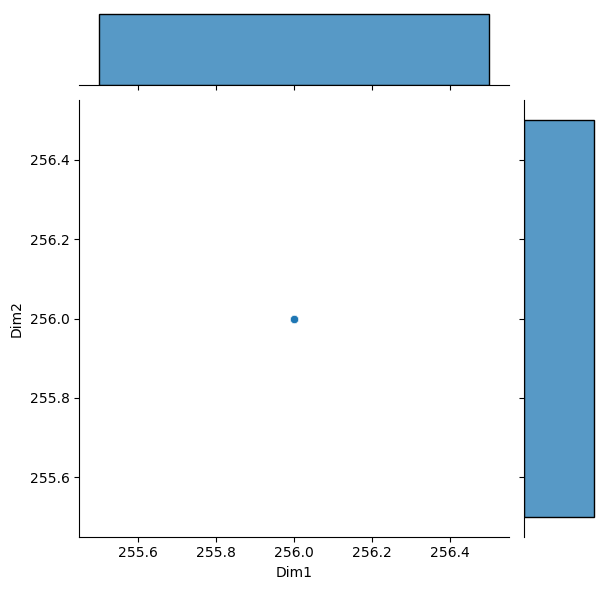

In [6]:
import os
from skimage.io import imread
import seaborn as sns
import pandas as pd

# Assuming 'valid_path' is defined somewhere in your code
valid_path = r'C:/Users/siddh/Downloads/Maize-Diseases-Detection-master/Maize-Diseases-Detection-master/Traning/Dataset/testt'

dim1 = []
dim2 = []

directory_path ='C:/Users/siddh/Downloads/Maize-Diseases-Detection-master/Maize-Diseases-Detection-master/Traning/Dataset/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'

for image_filename in os.listdir(os.path.join(valid_path, directory_path)):
    img_path = os.path.join(valid_path, directory_path, image_filename)
    img = imread(img_path)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

# Create a DataFrame from the lists
data = pd.DataFrame({'Dim1': dim1, 'Dim2': dim2})

# Use the DataFrame with jointplot
sns.jointplot(x='Dim1', y='Dim2', data=data)


In [7]:
IMAGE_SIZE=[244,244]
folders=glob(train_path+'/*')

In [8]:
import tensorflow as tf
from keras.applications import VGG16

# Assuming you have already defined IMAGE_SIZE
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

# Print the updated TensorFlow version
print("TensorFlow version:", tf.__version__)





TensorFlow version: 2.15.0


In [9]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
traindata_gen=ImageDataGenerator(
                             rotation_range=10,
                             rescale=1./255,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest'
                              )

testdata_gen=ImageDataGenerator(
                             
                             rescale=1./255)

In [13]:
traning_set=traindata_gen.flow_from_directory(train_path,
                                              target_size = (224, 224,),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6776 images belonging to 4 classes.


In [11]:
#traning_set.class_indices

Found 1834 images belonging to 4 classes.


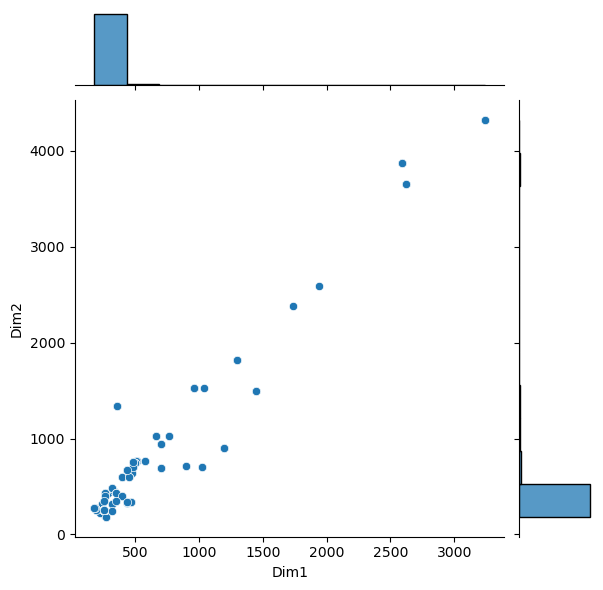

In [14]:
import os
from skimage.io import imread
import seaborn as sns
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'valid_path' is defined somewhere in your code
valid_path = r'C:/Users/siddh/Downloads/Maize-Diseases-Detection-master/Maize-Diseases-Detection-master/Traning/Dataset/test'

# Image dimensions
dim1 = []
dim2 = []

# Iterate through each class directory
for class_name in os.listdir(valid_path):
    class_path = os.path.join(valid_path, class_name)
    
    for image_filename in os.listdir(class_path):
        img_path = os.path.join(class_path, image_filename)
        img = imread(img_path)
        d1, d2, _ = img.shape
        dim1.append(d1)
        dim2.append(d2)

# Create a DataFrame from the lists
data = pd.DataFrame({'Dim1': dim1, 'Dim2': dim2})

# Plot the dimensions using seaborn
sns.jointplot(x='Dim1', y='Dim2', data=data)

# ImageDataGenerator for testing set
testdata_gen = ImageDataGenerator(rescale=1./255)  # You may need to add more preprocessing options
testing_set = testdata_gen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Now you can use the 'testing_set' in your model evaluation or prediction


In [15]:
result = model.fit_generator(
  traning_set,
  validation_data=testing_set,
  epochs=2,
  steps_per_epoch=len(traning_set),
  validation_steps=len(testing_set)
)

C:\Users\siddh\AppData\Local\Temp\ipykernel_15092\2685716095.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(


Epoch 1/2


212/212 [==============================] - 892s 4s/step - loss: 0.3204 - accuracy: 0.8884 - val_loss: 0.1797 - val_accuracy: 0.9373
Epoch 2/2
212/212 [==============================] - 873s 4s/step - loss: 0.1515 - accuracy: 0.9488 - val_loss: 0.1835 - val_accuracy: 0.9438


<Axes: >

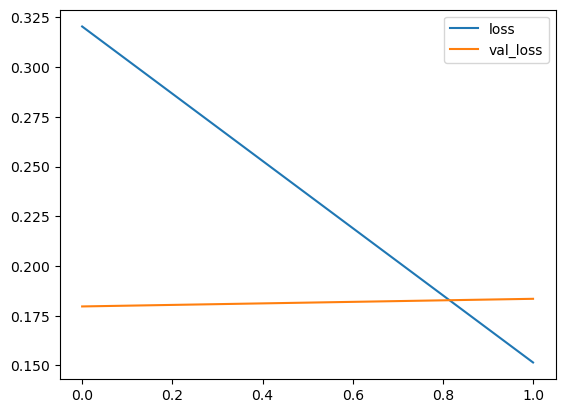

In [16]:
losses=pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
from tensorflow.keras.models import load_model
model.save('maize_disease_detection_new_model.h5')


C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# testing for a single image 


In [18]:
test_image='C:/Users/siddh/Downloads/Maize-Diseases-Detection-master/Maize-Diseases-Detection-master/Traning/Dataset/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/065fe7da-dcaf-41be-9332-5ec5ebceb94b___RS_GLSp 9337_270deg.JPG'
#test_image='C:\\Users\\1CYNOSA1\\Desktop\\vgg16\\valid\\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\\065fe7da-dcaf-41be-9332-5ec5ebceb94b___RS_GLSp 9337_270deg.JPG'

In [19]:
from tensorflow.keras.preprocessing import image


In [20]:
my_image=image.load_img(test_image,target_size=IMAGE_SIZE)

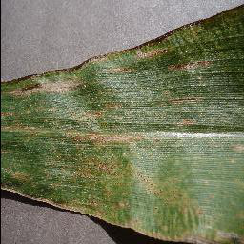

In [21]:
my_image

In [22]:
my_image = image.img_to_array(my_image)


In [23]:
my_image=np.expand_dims(my_image,axis=0)
my_image.shape

(1, 244, 244, 3)

In [24]:
x=model.predict(my_image)
x

1/1 [==============================] - 1s 690ms/step


array([[1.0000000e+00, 1.7262303e-31, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [22]:
traning_set.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

In [26]:
y='C:/Users/siddh/Downloads/Maize-Diseases-Detection-master/Maize-Diseases-Detection-master/Traning/Dataset/test/Corn_(maize)___healthy/d976fc74-23c2-4c34-a068-db120a61fe0f___R.S_HL 5561 copy_flipLR.jpg'
#y='C:\\Users\\1CYNOSA1\\Desktop\\vgg16\\valid\\Corn_(maize)___healthy\\d976fc74-23c2-4c34-a068-db120a61fe0f___R.S_HL 5561 copy_flipLR.jpg'

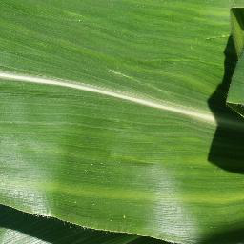

In [27]:
test2=image.load_img(y,target_size=IMAGE_SIZE)
test2


In [28]:
test2=image.img_to_array(test2)
test2.shape
test2=np.expand_dims(test2,axis=0)
test2.shape

(1, 244, 244, 3)

In [29]:
model.predict(test2)

1/1 [==============================] - 0s 426ms/step


array([[1.1335609e-27, 9.9250549e-01, 0.0000000e+00, 7.4944892e-03]],
      dtype=float32)